In [7]:
import matplotlib.pyplot as plt
import os
import math as m

In [100]:
def errorbar(filename, no_of_mass):
    #Error bar calculations:
    f = open(filename, "r")
    mass_number = []
    for line in f:
        if line.find("#mass")>=0:
            tmp = line[5:].split(":")
            tmp.append(":")
            tmp = tmp[0].strip()+tmp[-1]+tmp[1].strip()
            mass_number.append(tmp)
    f.close()

    iterations = [int(i.split(":")[-1]) for i in mass_number]

    f = open(filename, "r")
    start = False
    no_of_times = 0
    raw_datas = []
    for line in f:
        if not line[0]=="#" and not line == "\n":
            line.strip()
            tmp = line.split()
            if tmp[0]=="ALL:":
                start = True
                continue
            if start:
                no_of_times += 1
                raw_datas.append(line.strip())
    f.close()
    no_of_datas_for_each_iterations = int(no_of_times/sum(iterations))


    values = []
    for datas in raw_datas:
        values.append(datas.split())
    values = [[float(i) for i in j] for j in values]

    #Separating data set for every iteration for all masses combined
    all_datas = []
    total =  no_of_datas_for_each_iterations
    for j in range(sum(iterations)):
        i = j*total
        all_datas.append(values[i:i+total])

    # Giving the data sets according to the iterations for each mass separately
    # The mass variables are stored like a dictionary
    samples = {}
    for i in range(no_of_mass):
        samples["mass_sample_{}".format(i)] = []

    k,l = 0, -1
    for i in iterations:
        l += 1
        for j in range(i):
            samples["mass_sample_{}".format(l)].append(all_datas[k])
            k += 1

    # Getting all the ion counts and also calculating the mean of it for the iteration number of times
    k = 0
    data_run = no_of_datas_for_each_iterations
    mass_count_avg, all_mass_count = [], []

    for i in iterations:

        if i>1:
            to_avg = [[samples["mass_sample_{}".format(k)][j][m][2] for m in range(data_run)] for j in range(i)]
            all_mass_count.append(to_avg)
            mass = [[to_avg[l][j] for l in range(i)] for j in range(data_run)]
            mass_count = [sum(mass[j])/i for j in range(len(mass))]
            mass_count_avg.append(mass_count)
        k += 1

    # Calculating varience
    more_iterations_count = 0
    for i in iterations:
        if i>1:
            more_iterations_count += 1

    varience_adder, varience_collector, varience = [],[],[]

    for i in range(more_iterations_count):

        for j in range(data_run):

            for k in range(len(all_mass_count[i])):
                x, mu = all_mass_count[i][k][j], mass_count_avg[i][j]
                varience_adder.append((x-mu)**2)

            varience_collector.append(sum(varience_adder)/(len(varience_adder)-1))
            varience_adder = []

        varience.append(varience_collector)
        varience_collector = []

    #Standard deviations and standard error
    no_of_moreiterations = []
    for i in iterations:
        if i>1:
            no_of_moreiterations.append(i)

    standard_deviation = [[m.sqrt(i) for i in varience[j]] for j in range(len(varience))]
    standard_error = [[i/m.sqrt(no_of_moreiterations[j]) for i in standard_deviation[j]] for j in range(len(standard_deviation))]
    
    return standard_error, iterations, samples

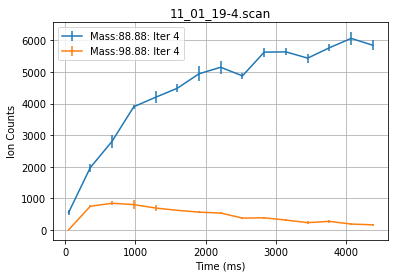

In [99]:
filename = "11_01_19-4.scan"
datas = []
f = open(filename, "r")

for line in f:
    if not line[0] == "#" and not line == "\n":
        a = line.split()
        datas.append(a)
        if line.strip() == "ALL:":
            del datas[-1]
            break
no_of_mass = len(datas[0])-2

f.close()

d = {}

for i in range(no_of_mass):
    d["mass_#{0}".format(i)] = []

for i in range(len(d)):
    d['mass_#{}'.format(i)] = [float(j[i+1]) for j in datas]

time = [float(i[0]) for i in datas]

error, iterations, mass_values = errorbar(filename, no_of_mass)
tmp = []
if len(error[0])>len(time):
    for i in error:
        del i[-1]
        tmp.append(i)
    error = tmp

j = 0
for i in range(no_of_mass):
    if iterations[i]>1:
        plt.errorbar(time, d["mass_#{}".format(i)], yerr = error[j], fmt = "-", 
                     label = "Mass:"+str(mass_values["mass_sample_{}".format(i)][0][0][0])+": Iter "+str(iterations[i]))
        j += 1
        
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Counts")
plt.legend()
plt.title(filename)
plt.savefig(filename+".png")
plt.show()
plt.close()

In [32]:
len(error), no_of_mass, iterations

(2, 3, [1, 4, 4])

In [ ]:
plt.errorbar(time, d["mass_#0"], error)
#plt.errorbar(time, d["mass_#0"], error,'-s','MarkerSize',10,'MarkerEdgeColor','red','MarkerFaceColor','red')

In [63]:
all_datas

{'mass_sample_0': [[[88.88, 50.0, 640.0],
   [88.88, 380.0, 2124.0],
   [88.88, 710.0, 2756.0],
   [88.88, 1040.0, 3872.0],
   [88.88, 1370.0, 4432.0],
   [88.88, 1700.0, 4614.0],
   [88.88, 2030.0, 4584.0],
   [88.88, 2360.0, 5068.0],
   [88.88, 2690.0, 4956.0],
   [88.88, 3020.0, 5374.0],
   [88.88, 3350.0, 6275.0],
   [88.88, 3680.0, 4820.0],
   [88.88, 4010.0, 6202.0],
   [88.88, 4340.0, 6110.0],
   [88.88, 4670.0, 5815.0],
   [88.88, 5000.0, 6381.0]]],
 'mass_sample_1': [[[88.88, 50.0, 602.0],
   [88.88, 380.0, 2174.0],
   [88.88, 710.0, 2945.0],
   [88.88, 1040.0, 4017.0],
   [88.88, 1370.0, 3758.0],
   [88.88, 1700.0, 4177.0],
   [88.88, 2030.0, 4876.0],
   [88.88, 2360.0, 4574.0],
   [88.88, 2690.0, 4580.0],
   [88.88, 3020.0, 5644.0],
   [88.88, 3350.0, 5432.0],
   [88.88, 3680.0, 5200.0],
   [88.88, 4010.0, 5572.0],
   [88.88, 4340.0, 5962.0],
   [88.88, 4670.0, 5536.0],
   [88.88, 5000.0, 6008.0]],
  [[88.88, 50.0, 543.0],
   [88.88, 380.0, 1758.0],
   [88.88, 710.0, 2251.0]

In [ ]:
print(varience, "\n",
     standard_deviation,"\n",
     standard_error)